## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
LEARNING_RATE = 0.001
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.8]
EPOCHS = 50

In [15]:
results = {}

for mt in MOMENTUM:
    keras.backend.clear_session()
    print("experienment with %.6f" % mt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mt)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train, y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test, y_test),
             shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    val_acc = model.history.history['val_accuracy']
    train_acc = model.history.history['accuracy']
    
    exp_name_tag = "exp-mt-%s" %str(mt)
    results[exp_name_tag] = {"train_loss": train_loss, "val_loss": val_loss, "val_acc": val_acc, "train_acc": train_acc}

experienment with 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============

50000/50000 [==============================] - 2s 48us/step - loss: 0.8770 - accuracy: 0.6916 - val_loss: 1.4063 - val_accuracy: 0.5231
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.8665 - accuracy: 0.6960 - val_loss: 1.3865 - val_accuracy: 0.5360
experienment with 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

50000/50000 [==============================] - 2s 49us/step - loss: 1.1693 - accuracy: 0.5901 - val_loss: 1.3608 - val_accuracy: 0.5152
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.1610 - accuracy: 0.5919 - val_loss: 1.3997 - val_accuracy: 0.5121
Epoch 49/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.1534 - accuracy: 0.5931 - val_loss: 1.3502 - val_accuracy: 0.5176
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.1455 - accuracy: 0.5971 - val_loss: 1.4450 - val_accuracy: 0.4961
experienment with 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________

50000/50000 [==============================] - 2s 49us/step - loss: 1.2973 - accuracy: 0.5451 - val_loss: 1.3939 - val_accuracy: 0.5005
Epoch 46/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.2918 - accuracy: 0.5469 - val_loss: 1.3901 - val_accuracy: 0.5028
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.2844 - accuracy: 0.5482 - val_loss: 1.3840 - val_accuracy: 0.5118
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.2777 - accuracy: 0.5507 - val_loss: 1.3978 - val_accuracy: 0.5009
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.2699 - accuracy: 0.5541 - val_loss: 1.4067 - val_accuracy: 0.5009
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.2657 - accuracy: 0.5557 - val_loss: 1.4567 - val_accuracy: 0.4831
experienment with 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)  

50000/50000 [==============================] - 3s 57us/step - loss: 1.3826 - accuracy: 0.5173 - val_loss: 1.4450 - val_accuracy: 0.4931
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3754 - accuracy: 0.5201 - val_loss: 1.4346 - val_accuracy: 0.4977
Epoch 45/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3697 - accuracy: 0.5209 - val_loss: 1.4675 - val_accuracy: 0.4864
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3644 - accuracy: 0.5238 - val_loss: 1.4277 - val_accuracy: 0.4970
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3565 - accuracy: 0.5269 - val_loss: 1.4325 - val_accuracy: 0.4905
Epoch 48/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.3517 - accuracy: 0.5282 - val_loss: 1.4403 - val_accuracy: 0.4858
Epoch 49/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.3458 - accuracy: 0.5287 - val_loss: 1.4238

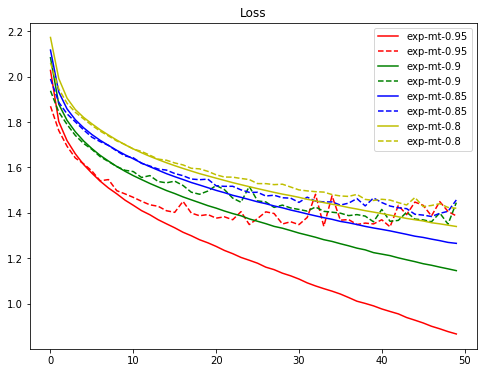

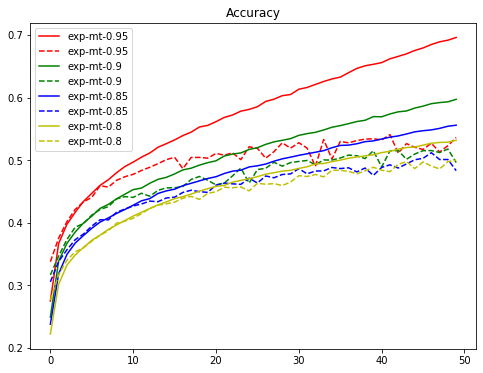

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label = cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label = cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()